### Notebook structure

This notebook is divided into 4 section:
- Intro and userful packages.
    - this section has to be compiled before all the others
- **Excercise 12.1** : Explore the performance of Deep Neural Networks (DNNs) in recognizing digit images.
Investigate the impact of various optimizers and the number of training epochs on model performance.
- **Excercise 12.2** : Introduce Convolutional Neural Networks (CNNs) for solving the same digit image recognition problem from Exercise 12.1.
Conduct a comparative analysis of CNN performance in relation to DNNs.
- **Excercise 12.3** : Apply the CNN model developed in Exercise 12.2 to a new dataset of handwritten digits.
Assess the model's performance on this fresh dataset.
        - the image files I use for this excercise are situated in the folders `handwritten_numbers/` and `handwritten_bad/`.

Please mind that some cells may take some time to be executed.

In [1]:
# Fundamental packages
import tensorflow as tf  # Import TensorFlow for deep learning capabilities
from tensorflow import keras  # Import Keras, a high-level neural networks API
import os  # Import the operating system module for file and directory operations
import numpy as np  # Import NumPy for numerical computations
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
import seaborn as sns  # Import Seaborn for improved visualizations

# Fixing the random seed to ensure reproducibility
seed = 0
np.random.seed(seed)  # Set the random seed for NumPy operations
tf.random.set_seed(seed)  # Set the random seed for TensorFlow operations

# Packages for graphic and visualization
import seaborn as sns  # Import Seaborn for enhancing data visualizations
from tqdm import tqdm  # Import tqdm for progress bars during iterations
sns.set_theme(style='whitegrid', palette='bright')  # Set Seaborn theme and color palette
cm = plt.get_cmap('tab20')  # Get a color map for use in plots

2023-11-02 12:22:16.117130: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 12:22:24.213781: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Exercise 12.1

In this exercise, I'll enhance a DNN training by extending the number of epochs to a suitable value and experimenting with four alternative optimizers. My primary focus will be on monitoring the accuracy and loss for both the training and validation datasets and providing a comprehensive assessment of their performances. 

**The MNIST Dataset**: I'll be using the MNIST dataset, which consists of handwritten digit images. Each image is a 28x28 grayscale image, and the dataset is divided into a training set and a testing set. The goal is to recognize and classify these images into one of the ten digit classes (0 through 9).


To enable the model to learn more effectively, I'll first elevate the number of training epochs keeping the same optimizer (SGD). The specific number of epochs should be determined through careful experimentation and may differ based on the problem at hand. We'll start by confronting the effect on the loss function and accuracy of using 5, 10 or 30 epochs.

In [2]:
# Loading and prepping the input data

from keras.datasets import mnist  # Import the MNIST dataset
from keras.utils import to_categorical  # Import a utility function for one-hot encoding

# Input image dimensions
img_rows, img_cols = 28, 28  # Define the dimensions of the input images (28x28 pixels)
num_classes = 10  # There are 10 digit classes (0-9)

# Load and preprocess the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()  # Load the MNIST dataset into training and testing sets

# Reshape and normalize the input data
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255  # Reshape and normalize training data
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255  # Reshape and normalize testing data

# One-hot encode the target labels
Y_train = to_categorical(Y_train, num_classes)  # Convert training labels to one-hot encoded format
Y_test = to_categorical(Y_test, num_classes)  # Convert testing labels to one-hot encoded format

# Print shapes of the preprocessed data
print('X_train shape:', X_train.shape)  # Display the shape of the training data
print('Y_train shape:', Y_train.shape)  # Display the shape of the training labels
print('X_test shape:', X_test.shape)  # Display the shape of the testing data
print('Y_test shape:', Y_test.shape)  # Display the shape of the testing labels

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
X_test shape: (10000, 784)
Y_test shape: (10000, 10)


In [3]:
# Here I define a function to create a DNN, consisting of 5 layers 

from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [4]:
# Here I define a function to compile the DNN using a specific optimizer

from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
    return model

In [5]:
# Here I train the model for 3 values of the number of epochs.
# I store the resulting models and relatives histories in list 'model11_DNN' and 'history11_DNN'

# Training parameters
batch_size = 32
epochs_DNN = [5, 10, 30]

# Create the deep neural net models and store training info in history
model11_DNN = []
history11_DNN = []

for i in range(3):
    model = compile_model('SGD')  # Create and compile the model
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs_DNN[i], verbose=1, validation_data=(X_test, Y_test))
    model11_DNN.append(model)
    history11_DNN.append(history)

2023-11-02 12:22:44.091611: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 19s 9ms/step - loss: 0.7678 - acc: 0.7728 - val_loss: 0.3207 - val_acc: 0.9145
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3881 - acc: 0.8885 - val_loss: 0.2476 - val_acc: 0.9302
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3137 - acc: 0.9115 - val_loss: 0.2077 - val_acc: 0.9400
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2691 - acc: 0.9233 - val_loss: 0.1804 - val_acc: 0.9479
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2367 - acc: 0.9332 - val_loss: 0.1633 - val_acc: 0.9517


2023-11-02 12:24:06.490798: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.7483 - acc: 0.7817 - val_loss: 0.3197 - val_acc: 0.9114
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3878 - acc: 0.8903 - val_loss: 0.2475 - val_acc: 0.9268
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3149 - acc: 0.9104 - val_loss: 0.2062 - val_acc: 0.9383
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2699 - acc: 0.9240 - val_loss: 0.1801 - val_acc: 0.9451
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2378 - acc: 0.9333 - val_loss: 0.1645 - val_acc: 0.9498
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2191 - acc: 0.9382 - val_loss: 0.1485 - val_acc: 0.9546
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1939 - acc: 0.9451 - val_loss: 0.1352 - val_acc: 0.9574
Epoch 8/10
1875/1875 [==============================] -

2023-11-02 12:26:55.089541: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/30
1875/1875 [==============================] - 22s 11ms/step - loss: 0.7330 - acc: 0.7826 - val_loss: 0.3075 - val_acc: 0.9144
Epoch 2/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3759 - acc: 0.8937 - val_loss: 0.2389 - val_acc: 0.9309
Epoch 3/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3064 - acc: 0.9134 - val_loss: 0.2001 - val_acc: 0.9431
Epoch 4/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2638 - acc: 0.9251 - val_loss: 0.1765 - val_acc: 0.9503
Epoch 5/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2330 - acc: 0.9339 - val_loss: 0.1595 - val_acc: 0.9535
Epoch 6/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2092 - acc: 0.9414 - val_loss: 0.1453 - val_acc: 0.9562
Epoch 7/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1896 - acc: 0.9464 - val_loss: 0.1337 - val_acc: 0.9592
Epoch 8/30
1875/1875 [==============================] 

313/313 [==============================] - 2s 7ms/step - loss: 0.1633 - acc: 0.9517

Test loss, epochs 5: 0.1632804423570633
Test accuracy, epochs 5: 0.95169997215271
313/313 [==============================] - 2s 6ms/step - loss: 0.1123 - acc: 0.9643

Test loss, epochs 10: 0.11228304356336594
Test accuracy, epochs 10: 0.9642999768257141
313/313 [==============================] - 2s 8ms/step - loss: 0.0643 - acc: 0.9803

Test loss, epochs 30: 0.06433983892202377
Test accuracy, epochs 30: 0.9803000092506409


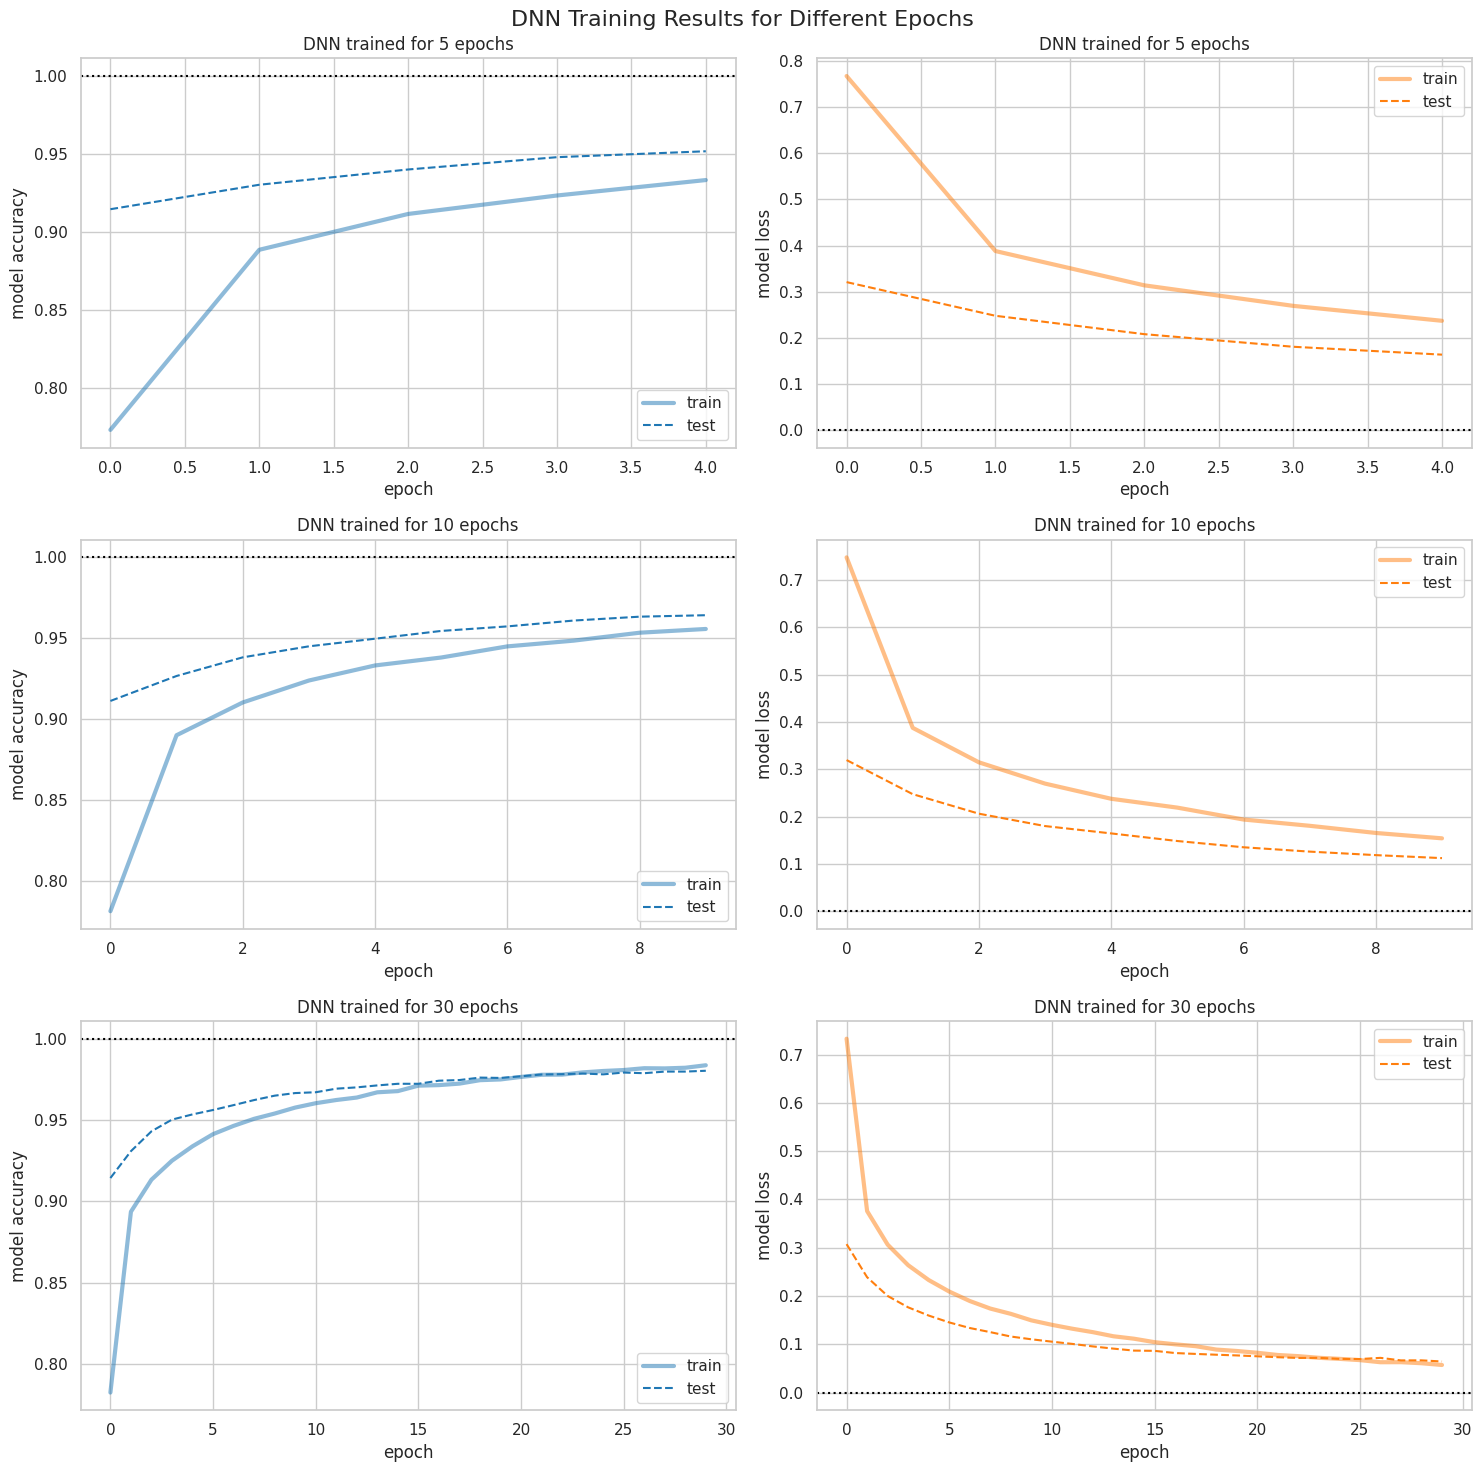

In [6]:
# Plot of the accuracy and loss function of the resulting models

# Create a figure and axes for subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('DNN Training Results for Different Epochs', fontsize=16)  

for i in range(len(epochs_DNN)):
    # Evaluate model
    score = model11_DNN[i].evaluate(X_test, Y_test, verbose=1)

    # Print performance
    print()
    print(f'Test loss, epochs {epochs_DNN[i]}:', score[0])
    print(f'Test accuracy, epochs {epochs_DNN[i]}:', score[1])

    # Look into training history
    ax[i, 0].set_title(f"DNN trained for {epochs_DNN[i]} epochs", fontsize=12)  # Set subplot title
    # Summarize history for accuracy
    ax[i, 0].plot(history11_DNN[i].history['acc'], linewidth=3,alpha=0.5,color=cm(0))  
    ax[i, 0].plot(history11_DNN[i].history['val_acc'], linestyle='--', color=cm(0))  
    ax[i, 0].axhline(1,color='black',linestyle='dotted')
    ax[i, 0].set_ylabel('model accuracy')
    ax[i, 0].set_xlabel('epoch')
    ax[i, 0].legend(['train', 'test'], loc='best')
    
    # Look into training history
    ax[i, 1].set_title(f"DNN trained for {epochs_DNN[i]} epochs", fontsize=12)  # Set subplot title
    # Summarize history for loss
    ax[i, 1].plot(history11_DNN[i].history['loss'], linewidth=3,alpha=0.5,color=cm(2))  
    ax[i, 1].plot(history11_DNN[i].history['val_loss'], linestyle='--', color=cm(2))  
    ax[i, 1].axhline(0,color='black',linestyle='dotted')
    ax[i, 1].set_ylabel('model loss')
    ax[i, 1].set_xlabel('epoch')
    ax[i, 1].legend(['train', 'test'], loc='best')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



After experimenting with different numbers of training epochs, I observed that increasing the number of epochs led to higher training accuracy, indicating improved learning. However, I also noticed, with 30 epochs, a growing gap between training and validation accuracy, which may suggest overfitting. While lower training loss is expected as the model learns, an increase in validation loss can indicate overfitting.

I also assessed the computational time consumed for training with longer epochs and found that the results for 30 epochs were not significantly better than those for 10 epochs. Therefore, I opted to continue the analysis with 10 epochs, as it provides a good balance between model performance and computational efficiency.

Now I'll experiment with the optimizers, in particular with `SGD`, `Adam`, `Adadelta` and `RMSprop`. 

In [7]:
# Here I train the model with for different optimizers.
# I store the resulting models and relatives histories in list 'model12_DNN' and 'history12_DNN'

optimizers = ['SGD', 'Adam', 'Adadelta', 'RMSprop']
# Training parameters
batch_size = 32
epochs = 10

# Create the deep neural net models and store training info in history
model12_DNN = []
history12_DNN = []

for opt in optimizers:
    print(f'Running {epochs} epochs of training for DNN compiled using {opt}')
    model = compile_model(opt)  # Create and compile the model
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))
    model12_DNN.append(model)
    history12_DNN.append(history)

Running 10 epochs of training for DNN compiled using SGD
Epoch 1/10


2023-11-02 12:35:35.279446: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 20s 10ms/step - loss: 0.7511 - acc: 0.7813 - val_loss: 0.3114 - val_acc: 0.9154
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3797 - acc: 0.8924 - val_loss: 0.2376 - val_acc: 0.9335
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3049 - acc: 0.9146 - val_loss: 0.1984 - val_acc: 0.9423
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2610 - acc: 0.9261 - val_loss: 0.1742 - val_acc: 0.9490
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2314 - acc: 0.9347 - val_loss: 0.1580 - val_acc: 0.9523
Epoch 6/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2082 - acc: 0.9407 - val_loss: 0.1417 - val_acc: 0.9567
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1891 - acc: 0.9466 - val_loss: 0.1280 - val_acc: 0.9605
Epoch 8/10
1875/1875 [==============================] - 21s 

2023-11-02 12:39:01.793728: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 21s 10ms/step - loss: 0.2774 - acc: 0.9185 - val_loss: 0.1071 - val_acc: 0.9656
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1186 - acc: 0.9657 - val_loss: 0.0933 - val_acc: 0.9714
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0867 - acc: 0.9747 - val_loss: 0.0917 - val_acc: 0.9709
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0666 - acc: 0.9801 - val_loss: 0.0776 - val_acc: 0.9783
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0569 - acc: 0.9822 - val_loss: 0.0804 - val_acc: 0.9768
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0451 - acc: 0.9862 - val_loss: 0.0729 - val_acc: 0.9810
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0406 - acc: 0.9871 - val_loss: 0.0733 - val_acc: 0.9812
Epoch 8/10
1875/1875 [==============================] - 27s

Evaluating performance of SGD optimizer
313/313 [==============================] - 2s 7ms/step - loss: 0.1082 - acc: 0.9666
Evaluating performance of Adam optimizer
313/313 [==============================] - 2s 6ms/step - loss: 0.0856 - acc: 0.9797
Evaluating performance of Adadelta optimizer
313/313 [==============================] - 2s 7ms/step - loss: 0.9215 - acc: 0.8231
Evaluating performance of RMSprop optimizer
313/313 [==============================] - 2s 5ms/step - loss: 0.1559 - acc: 0.9752


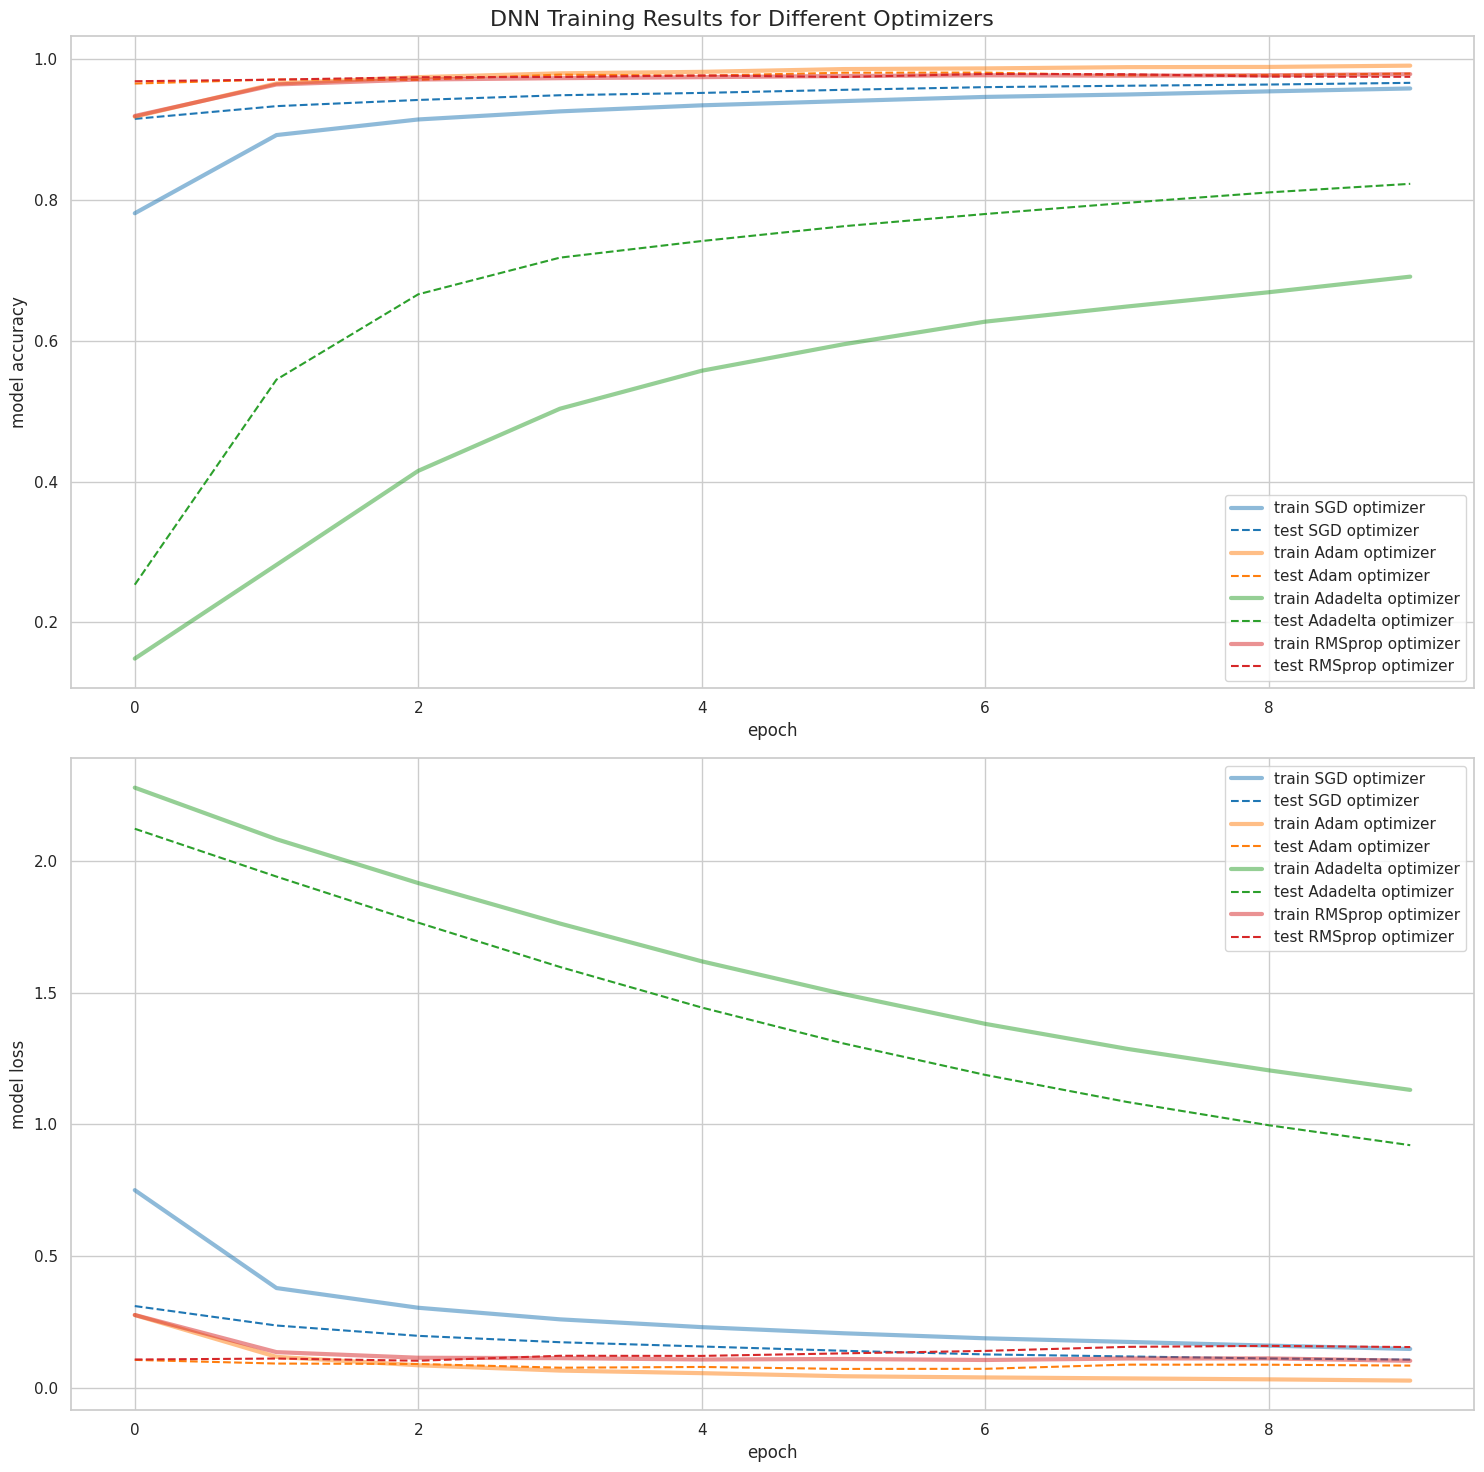

In [8]:
# Plot of the accuracy and loss function of the resulting models
# Create a figure and axes for subplots
fig, ax = plt.subplots(2, 1, figsize=(15, 15))
fig.suptitle('DNN Training Results for Different Optimizers', fontsize=16)  # Set main title

for i, opt in enumerate(optimizers):
    print('Evaluating performance of '+opt+' optimizer')
    # Evaluate model
    score = model12_DNN[i].evaluate(X_test, Y_test, verbose=1)
    # Plot accuracy
    ax[0].plot(history12_DNN[i].history['acc'], label='train ' + opt + ' optimizer',linewidth=3,alpha=0.5,color=cm(2*i))
    ax[0].plot(history12_DNN[i].history['val_acc'], linestyle='--', label='test ' + opt + ' optimizer',color=cm(2*i))
    ax[0].set_ylabel('model accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].legend(loc='best')

    # Plot loss
    ax[1].plot(history12_DNN[i].history['loss'], label='train ' + opt + ' optimizer',linewidth=3,alpha=0.5,color=cm(2*i))
    ax[1].plot(history12_DNN[i].history['val_loss'], linestyle='--', label='test ' + opt + ' optimizer',color=cm(2*i))
    ax[1].set_ylabel('model loss')
    ax[1].set_xlabel('epoch')
    ax[1].legend(loc='best')


plt.tight_layout()  # Adjust spacing between subplots
plt.show()



After conducting a performance analysis of various optimizers, it becomes evident that the choice of optimizer significantly influences the final outcome. Notably, it's observed that the optimizers `Adam` and `RMSprop` exhibit similar characteristics, but ultimately `Adam` outperforms the rest. On the other hand, `Adadelta` consistently delivers inferior results compared to the other optimizers.

Finally let's the result of the classificator on some random test elements

313/313 [==============================] - 4s 6ms/step


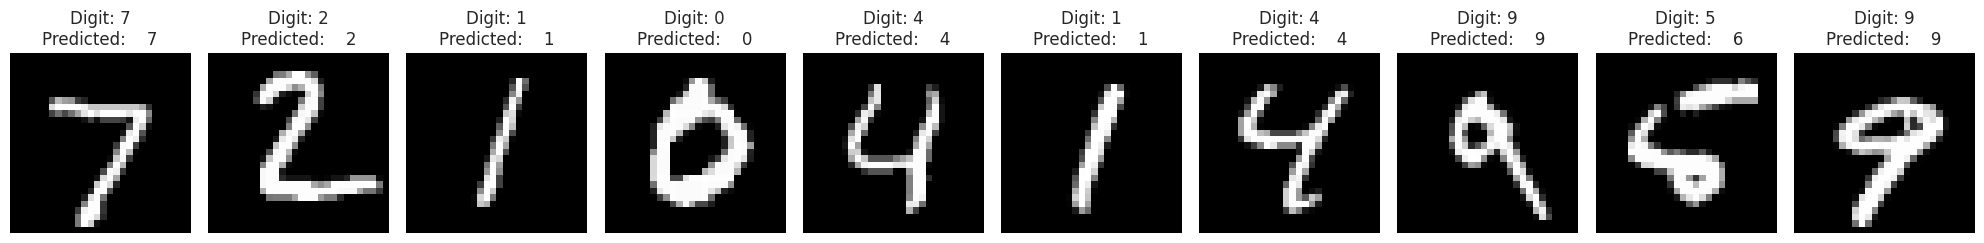

In [9]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model12_DNN[opt=='Adam'].predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(20, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.tight_layout()
plt.show()

The performance of the model is not bad, of this small sample 9 digits out of 10 are classified correctly.

# Excercise 12.2

In this exercise, I build a Convolutional Neural Network (CNN) to work with the same MNIST dataset that I used in the previous sections. A CNN is a type of neural network that is particularly effective for tasks involving image data. 


**Modification of the Model**: In this exercise, I am modifying your neural network model by introducing convolutional and pooling layers. This modification is a key characteristic of a CNN. 

   - **Convolutional Layers**: Convolutional layers apply filters (kernels) to the input data to extract features. These filters slide over the input data, detecting patterns, edges, and more complex features. Convolutional layers are effective for learning hierarchical representations of the input.

   - **Pooling Layers**: Pooling layers downsample the output of convolutional layers by selecting the most important information. Common pooling operations include max-pooling, which retains the maximum value in a region, reducing the spatial dimensions.

This type of network is designed to automatically learn relevant features from the input data and is particularly well-suited for image classification tasks.


In [10]:
#Loading the input data

from keras.datasets import mnist
from keras.utils import to_categorical
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [11]:
# reshape data, depending on Keras backend

from keras.layers import Flatten, Conv2D, MaxPooling2D
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_CNN():
    model = Sequential([
        # Rescale the input data to the range [0, 1]
        keras.layers.Rescaling(1./255, input_shape=(img_rows, img_cols, 1)),
        
        # Convolutional layers with ReLU activation
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(3, 3)),
        
        keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Dropout and Batch Normalization for regularization
        keras.layers.Dropout(0.25),
        keras.layers.BatchNormalization(),
        
        # Flatten the output
        keras.layers.Flatten(),
        
        # Fully connected layers
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.5),
        
        # Output layer for classification
        keras.layers.Dense(10, activation='softmax')
    ])
    
    # Compile the model with categorical cross-entropy loss, 'Adam' optimizer, and accuracy metric
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    
    return model


Before proceeding, let's provide an overview of the functions of the various layers in the model and discuss the reasoning behind the choice of hyperparameters:

1. **Rescaling Layer**: 
   -  The rescaling factor of 1/255 is used to normalize pixel values from the [0, 255] range to the [0, 1] range. This is a common preprocessing step for image data to ensure that all input features have similar scales, which can improve training stability and convergence.

2. **Convolutional Layers**:
   - `keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu')`: 
     - `16` filters: This determines the number of filters applied to the input data. Increasing the number of filters allows the model to learn more complex features but also makes the model more computationally expensive.
     - `kernel_size=(3, 3)`: The size of the convolutional filters. A smaller filter size captures fine-grained features, while a larger filter size captures more global features.
     - `activation='relu'`: The Rectified Linear Unit (ReLU) activation function introduces non-linearity into the model, which enables the model to learn complex patterns.

3. **MaxPooling Layers**:
   - `keras.layers.MaxPooling2D(pool_size=(3, 3))` and `keras.layers.MaxPooling2D(pool_size=(2, 2))`: Max-pooling layers downsample the feature maps. 
     - `pool_size=(3, 3)` and `pool_size=(2, 2)`: These pool sizes determine how the downsampling is performed. A larger pool size reduces spatial dimensions more aggressively.

4. **Dropout Layer**:
   - `keras.layers.Dropout(0.25)` and `keras.layers.Dropout(0.5)`: Dropout is a regularization technique that helps prevent overfitting. The values, `0.25` and `0.5`, represent the fraction of input units to drop during training. A dropout of 0.25 means 25% of the neurons are randomly dropped during each training batch.

5. **Batch Normalization Layer**:
   - `keras.layers.BatchNormalization()`: Batch normalization is used to stabilize and accelerate the training of neural networks. It helps ensure that the input to each layer has a mean of approximately zero and a standard deviation of approximately one, which can improve training efficiency.

6. **Flatten Layer**:
   - `keras.layers.Flatten()`: This layer is used to flatten the 2D feature maps into a 1D vector. It's typically used before the fully connected layers.

7. **Fully Connected Layers**:
   - `keras.layers.Dense(64, activation='relu')`: The `64` units in the fully connected layer represent the number of neurons in this layer. The ReLU activation introduces non-linearity.
   - `keras.layers.Dense(10, activation='softmax')`: The final output layer with `10` units corresponds to the ten digit classes (0 through 9). The softmax activation is used for multi-class classification, providing probabilities for each class.


In [13]:
# Training the CNN for 10 epochs

epochs =10
model2_CNN = create_CNN()
model2_CNN.summary()
history2_CNN = model2_CNN.fit(X_train, Y_train, batch_size=32, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 16)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 32)          0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 2, 2, 32)         

Epoch 1/10
1875/1875 [==============================] - 30s 15ms/step - loss: 0.3812 - accuracy: 0.8808 - val_loss: 0.0627 - val_accuracy: 0.9800
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1473 - accuracy: 0.9571 - val_loss: 0.0860 - val_accuracy: 0.9741
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1187 - accuracy: 0.9656 - val_loss: 0.0505 - val_accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1041 - accuracy: 0.9702 - val_loss: 0.0424 - val_accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0936 - accuracy: 0.9729 - val_loss: 0.0483 - val_accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0842 - accuracy: 0.9754 - val_loss: 0.0395 - val_accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0822 - accuracy: 0.9761 - val_loss: 0.0369 -

313/313 [==============================] - 2s 7ms/step - loss: 0.0386 - accuracy: 0.9874


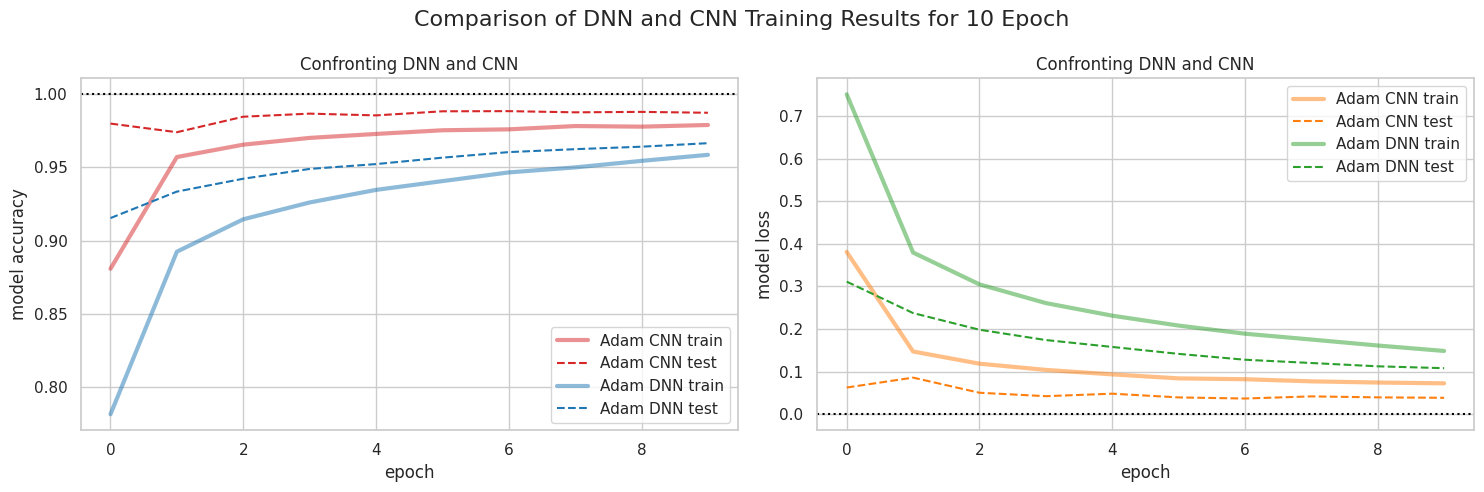

In [15]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Create a figure and axes for subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(f'Comparison of DNN and CNN Training Results for {epochs} Epoch', fontsize=16)

# Evaluate the models
score_CNN = model2_CNN.evaluate(X_test, Y_test, verbose=1)

# Subplot 1: Accuracy
ax[0].set_title(f"Confronting DNN and CNN", fontsize=12)
# Access accuracy values for CNN model
if 'accuracy' in history2_CNN.history:
    cnn_train_acc_key = 'accuracy'
    cnn_val_acc_key = 'val_accuracy'
else:
    cnn_train_acc_key = 'acc'
    cnn_val_acc_key = 'val_acc'

ax[0].plot(history2_CNN.history[cnn_train_acc_key], linewidth=3, alpha=0.5, color=cm(6))
ax[0].plot(history2_CNN.history[cnn_val_acc_key], linestyle='--', color=cm(6))

# Access accuracy values for DNN model
if 'accuracy' in history12_DNN[opt == 'Adam'].history:
    dnn_train_acc_key = 'accuracy'
    dnn_val_acc_key = 'val_accuracy'
else:
    dnn_train_acc_key = 'acc'
    dnn_val_acc_key = 'val_acc'

ax[0].plot(history12_DNN[opt == 'Adam'].history[dnn_train_acc_key], linewidth=3, alpha=0.5, color=cm(0))
ax[0].plot(history12_DNN[opt == 'Adam'].history[dnn_val_acc_key], linestyle='--', color=cm(0))
ax[0].axhline(1, color='black', linestyle='dotted')
ax[0].set_ylabel('model accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['Adam CNN train', 'Adam CNN test', 'Adam DNN train', 'Adam DNN test'], loc='best')

# Subplot 2: Loss
ax[1].set_title(f"Confronting DNN and CNN", fontsize=12)
# Access loss values for CNN model
ax[1].plot(history2_CNN.history['loss'], linewidth=3, alpha=0.5, color=cm(2))
ax[1].plot(history2_CNN.history['val_loss'], linestyle='--', color=cm(2))

# Access loss values for DNN model
ax[1].plot(history12_DNN[opt == 'Adam'].history['loss'], linewidth=3, alpha=0.5, color=cm(4))
ax[1].plot(history12_DNN[opt == 'Adam'].history['val_loss'], linestyle='--', color=cm(4))
ax[1].axhline(0, color='black', linestyle='dotted')
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['Adam CNN train', 'Adam CNN test', 'Adam DNN train', 'Adam DNN test'], loc='best')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


The previous plot provides a visual representation of the model performance. By observing it is clear that the CNN has a better performance than the DNN I used previously, in fact CNNs are well-suited for image recognition tasks due to their ability to automatically learn relevant features from the input data. Finally let's observe the CNN predictions on some random element of the test sample.

313/313 [==============================] - 2s 6ms/step


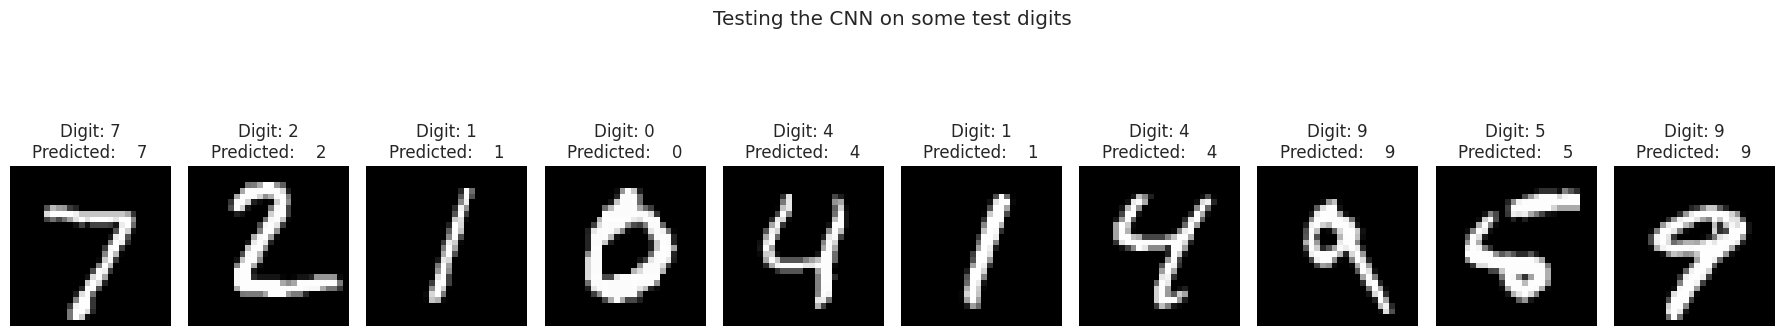

In [16]:

predictions = model2_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)


plt.figure(figsize=(18, 8)) 
plt.suptitle('Testing the CNN on some test digits')

for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.tight_layout()
plt.show()

In this case the CNN is able to correctly classify all the digits.

# Excercise 12.3


In the final stage of this experiment, I will put the previously constructed Convolutional Neural Network (CNN) to the test by using it to analyze a set of fresh images. These images are handwritten by me in a format consistent with the ones used in the previous sections. This real-world testing is designed to evaluate how well the model generalizes to variations in writing styles, including those that may differ from the standardized MNIST dataset.

This hands-on approach enables me to assess the model's adaptability and recognition capabilities in a scenario that closely mimics real-world applications. The significance of this test lies in its ability to uncover how the model performs in practical settings. Variations in writing style, stroke thickness, and orientation are common in real-world handwritten digits. 

1/1 [==============================] - 0s 51ms/step


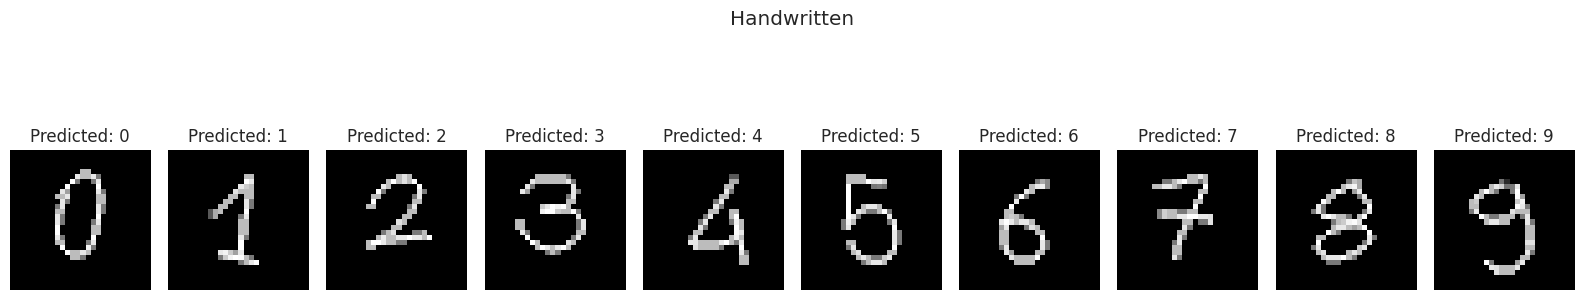

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # Required for handling images

plt.figure(figsize=(16,4))
plt.suptitle('Handwritten')


for k in range(10):
    digit_filename = 'handwritten_numbers/'+str(k)+'.png'
    digit = Image.open(digit_filename).convert('L')
    data = np.asarray(digit)
    data = data.reshape(1,28,28,1)
    predictions = np.argmax(model2_CNN.predict(data)) 
    plt.subplot(1,10,k+1)
    plt.imshow(digit, cmap='gray')
    plt.title('Predicted: '+str(predictions))
    plt.axis('off')
plt.tight_layout()
plt.show()

As expected, the CNN is performing well in recognizing all of the input images. To further evaluate the CNN's performance and its ability to handle more challenging image inputs, I will test it with images that are more difficult to recognize. This additional test will help assess the model's robustness and its capacity to handle complex and less conventional patterns.

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 111ms/step


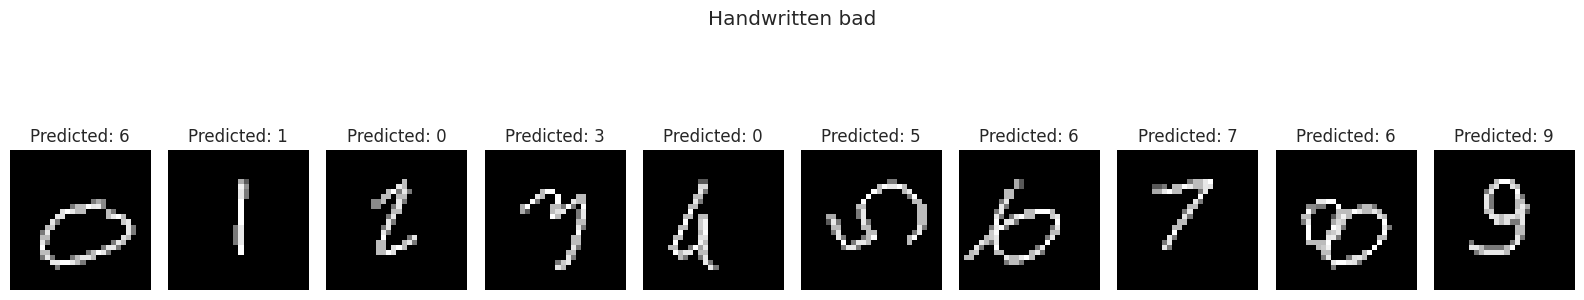

In [21]:
plt.figure(figsize=(16,4))
plt.suptitle('Handwritten bad')


for k in range(10):
    digit_filename = 'handwritten_bad/'+str(k)+'.png'
    digit = Image.open(digit_filename).convert('L')
    data = np.asarray(digit)
    data = data.reshape(1,28,28,1)
    predictions = np.argmax(model2_CNN.predict(data)) 
    plt.subplot(1,10,k+1)
    plt.imshow(digit, cmap='gray')
    plt.title('Predicted: '+str(predictions))
    plt.axis('off')
plt.tight_layout()
plt.show()

The experimental results show that the Convolutional Neural Network (CNN) exhibits a noticeable decline in accuracy when confronted with rotated or distorted images. In such scenarios, the CNN faces challenges in correctly classifying digits. This reduction in accuracy can be attributed to the network's limited ability to generalize across variations in the input data.

To mitigate these challenges and enhance the CNN's performance, one effective approach is to incorporate data augmentation techniques into the training process. Data augmentation involves applying various transformations to the training data, creating augmented versions of the original images. These transformations can include rotations, translations, scaling, and distortion, among others.

By introducing data augmentation, the CNN can learn to better adapt to the variations it may encounter during inference. For instance, by exposing the network to rotated or distorted versions of the digits during training, it becomes more robust to these conditions, improving its ability to correctly classify digits in real-world scenarios. 
